# 제어공학2 5주차 - Note 2
  > ## Transfer function

### control library 설치

In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 4.5 MB/s eta 0:00:00


### numpy, control, matplotlib import

In [3]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

### 간단한 transfer function을 변수 H에 입력해보기
> #### Transfer function은 기본적으로 symbol 형태이다

In [4]:
num = np.array([2])
den = np.array([5, 1])
H = ctl.tf(num, den)
H

TransferFunction(array([2]), array([5, 1]))

### 두 개의 transfer function series 연결 (곱셈)

In [ ]:
num1 = np.array([2])
den1 = np.array([1, 0])
num2 = np.array([3])
den2 = np.array([4, 1])
H1 = ctl.tf(num1, den1)
H2 = ctl.tf(num2, den2)
Hs = ctl.series(H1, H2)
Hs

TransferFunction(array([6]), array([4, 1, 0]))

In [ ]:
Hs = H1*H2
Hs

TransferFunction(array([6]), array([4, 1, 0]))

### 두 개의 transfer function parallel 연결 (덧셈)

In [ ]:
Hp = ctl.parallel(H1, H2)
Hp

TransferFunction(array([11,  2]), array([4, 1, 0]))

In [ ]:
Hp = H1+H2
Hp

TransferFunction(array([11,  2]), array([4, 1, 0]))

### Transfer function에서 pole과 zero 구하기
> #### plot=True로 하거나, 입력하지 않으면 그래프가 그려진다

In [ ]:
(p, z) = ctl.pzmap(Hp, plot=False)
p, z

(array([-0.25+0.j,  0.  +0.j]), array([-0.18181818+0.j]))

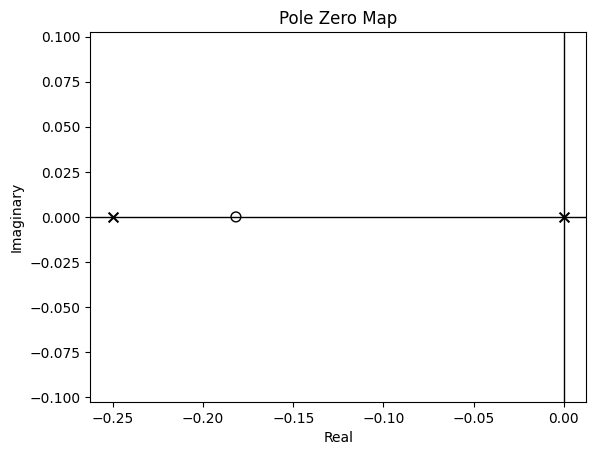

In [ ]:
(p, z) = ctl.pzmap(Hp)

### 피드백 연결
> #### (Unity feedback인 경우 feedback gain이 1이다)

In [ ]:
num = np.array([2])
den = np.array([1 , 0])
L = ctl.tf(num, den)
H = ctl.feedback(L, 1)
H

TransferFunction(array([2]), array([1, 2]))

### Transfer function으로부터 수식의 numerator, denominator 상수 리스트 받아오기

In [ ]:
num_, den_ = ctl.tfdata(H)
num_, den_

([[array([2])]], [[array([1, 2])]])

### $2^{nd}$-order transfer function을 G에 입력

In [ ]:
G = ctl.tf([3],[4, 1, 1])
G

TransferFunction(array([3]), array([4, 1, 1]))

### Step response 확인하기

Text(0.5, 1.0, 'Response of a Second Order System')

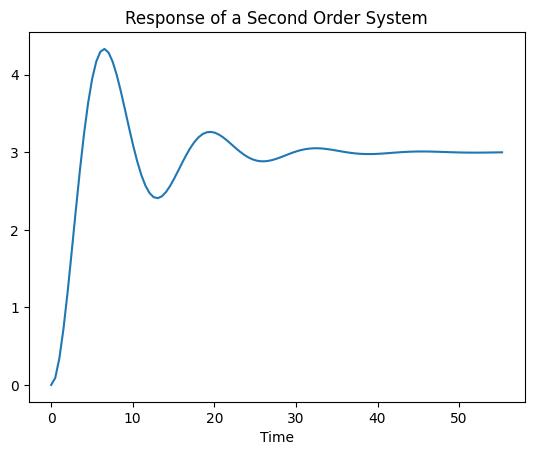

In [ ]:
t,y = ctl.step_response(G)
plt.plot(t,y)
plt.xlabel('Time')
plt.title('Response of a Second Order System')